# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re #regular expression 
import string
import nltk #natural language
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv('Twitter.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# Preprocessing the dataset


In [4]:
#remove pattern in the input text
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for word in r:
        input_txt = re.sub(word,"",input_txt)
    return input_txt

In [5]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
#remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")

In [7]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
#remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zS-z#]"," ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [9]:
#remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x:" ".join([w for w in x.split() if len(w) > 3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [10]:
#individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [11]:
#stem the words
from nltk.stem.porter import PorterStemmer
stremmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence:[stremmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [12]:
#combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


# Exploratory data analysis

In [13]:
#!pip install wordcloud


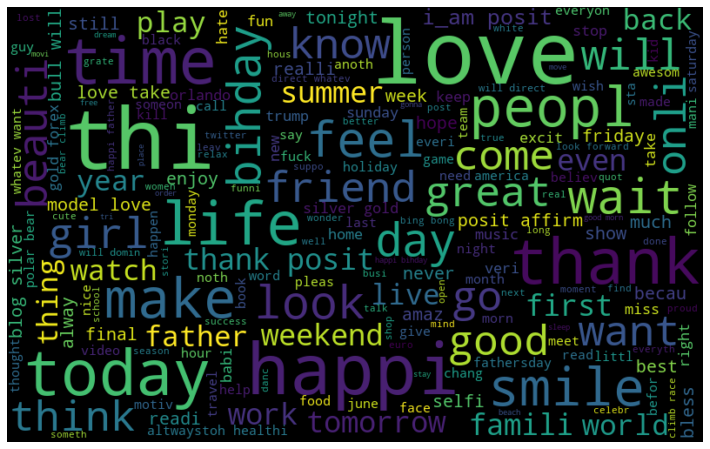

In [14]:
#visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800 , height = 500, random_state = 42,max_font_size = 100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

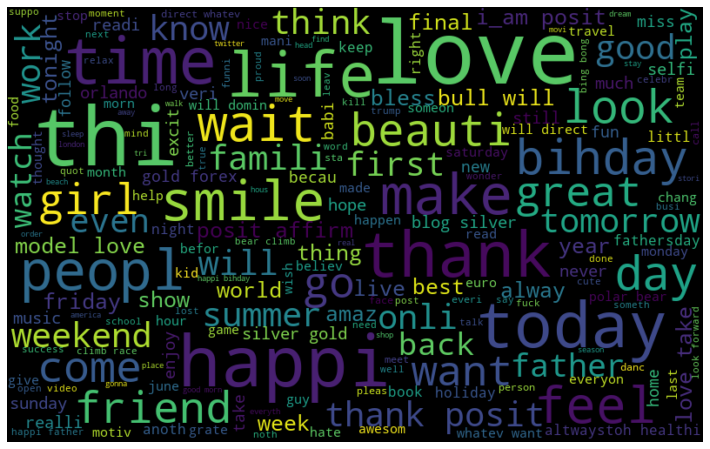

In [15]:
#frequent words visualization for positive 
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800 , height = 500, random_state = 42,max_font_size = 100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

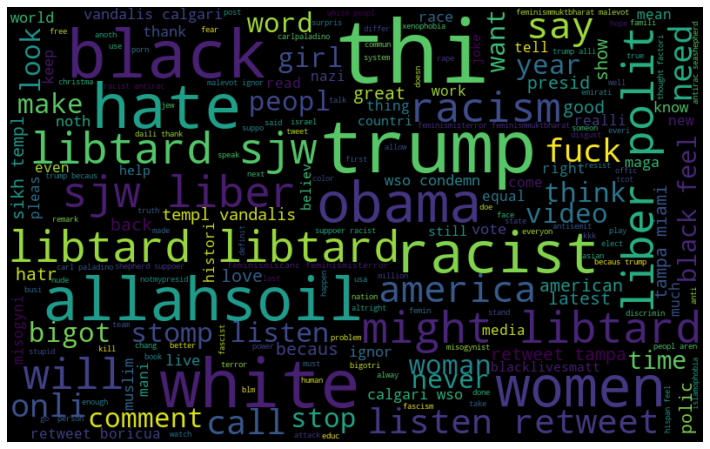

In [16]:
#frequent words visualization for negative 
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800 , height = 500, random_state = 42,max_font_size = 100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
#extract the hastag
def hastag_extract(tweets):
    hastags = []
    #loop words int he tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)",tweet)
        hastags.append(ht)
    return hastags

In [18]:
#extract hastag from non racist/sexist tweets
ht_pos = hastag_extract(df['clean_tweet'][df['label']==0])

#extract hastag from racist/sexist tweets
ht_neg = hastag_extract(df['clean_tweet'][df['label']== 1])


In [19]:
ht_pos[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [20]:
#unnest list
ht_pos = sum(ht_pos,[])
ht_neg = sum(ht_neg,[])

In [21]:
ht_pos[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [22]:
freq = nltk.FreqDist(ht_pos)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


In [23]:
freq = nltk.FreqDist(ht_neg)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


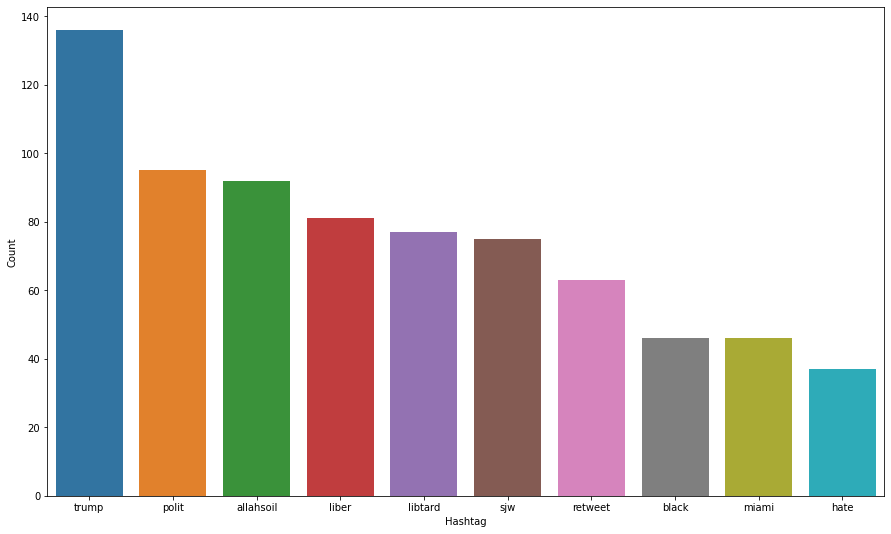

In [24]:
#select top 10 hastags
d = d.nlargest(columns='Count', n = 10)
plt.figure(figsize=(15,9))
sns.barplot(data= d, x='Hashtag',y='Count')
plt.show()

# Input Split

In [25]:
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vector = CountVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')
bow = bow_vector.fit_transform(df['clean_tweet'])

In [26]:
#bow

# Model training

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow,df['label'],random_state=42,test_size=0.25)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [30]:
#training
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [31]:
#testing
pred = model.predict(x_test)
f1_score(y_test,pred)

0.49763033175355453

In [35]:
accuracy_score(y_test,pred)

0.9469403078463271

In [37]:
#use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:,1] >= 0.3
pred = pred.astype(np.int)
f1_score(y_test,pred)

0.5545722713864307

In [38]:
accuracy_score(y_test,pred)

0.9433112251282693

In [40]:
pred_prob[0][1] >= 0.3

False